In [1]:
import os
from chemwalker.gnps import Proteosafe
from chemwalker.utils import run_metfrag, walk_conn_comp, get_db
from chemwalker.draw import *
import pandas as pd
import numpy as np

In [2]:
taskid = 'a0b4377f6e4540268602c30fedf69b0b'

gnps_result = Proteosafe(taskid, 'FBMN')
gnps_result.get_gnps()
net = gnps_result.net
gnps_tab = gnps_result.gnps
spectra = gnps_result.spectra
match_tab = gnps_result.dbmatch

In [3]:
net.head()

,CLUSTERID1,CLUSTERID2,ComponentIndex,Cosine,DeltaMZ
0,150,350,1,0.6612,-197.089
1,205,617,1,0.9478,-0.000
2,617,3066,1,0.8151,154.091
3,37,69,1,0.8938,0.000
4,201,238,1,0.9712,34.021


In [4]:
net.shape

(406, 5)

In [5]:
net['ComponentIndex'].value_counts().to_dict()

{1: 177,
 3: 55,
 11: 49,
 8: 38,
 6: 32,
 5: 21,
 10: 18,
 15: 3,
 17: 2,
 9: 2,
 12: 2,
 7: 1,
 13: 1,
 14: 1,
 4: 1,
 16: 1,
 2: 1,
 18: 1}

In [6]:
nset = net['ComponentIndex'].unique().tolist()
nset

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [7]:
match_tab.head()

,SpectrumID,Compound_Name,Ion_Source,Instrument,Compound_Source,PI,Data_Collector,Adduct,Precursor_MZ,ExactMass,...,FileScanUniqueID,NumberHits,tags,MoleculeExplorerDatasets,MoleculeExplorerFiles,InChIKey,InChIKey-Planar,superclass,class,subclass
0,CCMSLIB00000852203,"NCGC00385365-01_C11H16O3_2(4H)-Benzofuranone, ...",LC-ESI,Maxis II HD Q-TOF Bruker,isolated,Jadhav/Dorrestein,lfnothias,M+H,197.117,196.110,...,spectra_filtered/specs_ms.mgf106,1,NaN,8,131,XEVQXKKKAVVSMW-WRWORJQWSA-N,XEVQXKKKAVVSMW,NaN,NaN,NaN
1,CCMSLIB00003139295,Spectral Match to (-)-Epicatechin from NIST14,ESI,Q-TOF,Isolated,Data from Souard,Data deposited by souardf,M+H,291.088,0.000,...,spectra_filtered/specs_ms.mgf1071,1,NaN,36,2325,NaN,NaN,NaN,NaN,NaN
2,CCMSLIB00000213963,Massbank:FIO00265 Velutin,ESI,LC-ESI-QTOF,Isolated,Putative Massbank Match,Massbank,[M+H]+,315.087,0.000,...,spectra_filtered/specs_ms.mgf1115,1,NaN,0,0,ROCUOVBWAWAQFD-UHFFFAOYSA-N,ROCUOVBWAWAQFD,Phenylpropanoids and polyketides,Flavonoids,O-methylated flavonoids
3,CCMSLIB00000846878,"NCGC00384563-01!5,7-dihydroxy-2-(4-hydroxyphen...",LC-ESI,Maxis II HD Q-TOF Bruker,isolated,Jadhav/Dorrestein,lfnothias,M+H,535.144,534.137,...,spectra_filtered/specs_ms.mgf1129,1,NaN,23,446,LDVNKZYMYPZDAI-UHFFFAOYSA-N,LDVNKZYMYPZDAI,Phenylpropanoids and polyketides,Flavonoids,Flavonoid glycosides
4,CCMSLIB00003236728,Narcissin,ESI,Q-TOF,Isolated,NIST,NIST,M+H,625.176,0.000,...,spectra_filtered/specs_ms.mgf1145,1,NaN,0,0,UIDGLYUNOUKLBM-UHFFFAOYSA-N,UIDGLYUNOUKLBM,Phenylpropanoids and polyketides,Flavonoids,Flavonoid glycosides


In [8]:
match_tab.columns

Index(['SpectrumID', 'Compound_Name', 'Ion_Source', 'Instrument',
       'Compound_Source', 'PI', 'Data_Collector', 'Adduct', 'Precursor_MZ',
       'ExactMass', 'Charge', 'CAS_Number', 'Pubmed_ID', 'Smiles', 'INCHI',
       'INCHI_AUX', 'Library_Class', 'IonMode', 'UpdateWorkflowName',
       'LibraryQualityString', '#Scan#', 'SpectrumFile', 'LibraryName',
       'MQScore', 'Organism', 'TIC_Query', 'RT_Query', 'MZErrorPPM',
       'SharedPeaks', 'MassDiff', 'LibMZ', 'SpecMZ', 'SpecCharge',
       'FileScanUniqueID', 'NumberHits', 'tags', 'MoleculeExplorerDatasets',
       'MoleculeExplorerFiles', 'InChIKey', 'InChIKey-Planar', 'superclass',
       'class', 'subclass'],
      dtype='object')

In [9]:
gnps_tab.head()

,ATTRIBUTE_AB,ATTRIBUTE_AFE,ATTRIBUTE_Asat,ATTRIBUTE_C,ATTRIBUTE_C/N,ATTRIBUTE_CMSF,ATTRIBUTE_CS,ATTRIBUTE_Family,ATTRIBUTE_Forest_Region,ATTRIBUTE_Genus,...,SpectrumID,SumPeakIntensity,UniqueFileSourcesCount,cluster index,componentindex,number of spectra,parent mass,precursor charge,precursor mass,sum(precursor intensity)
0,"0.01,0.006999999999999999,0.016,0.009000000000...","0.064,0.12,0.03,0.048","23.933000000000003,24.941,20.902,32.262","18.426,20.231,22.241,14.155",NaN,"484.18300000000005,464.898,456.674,459.564","0.135,0.211,0.132",Arecaceae,"Primary,Secondary",Euterpe,...,NaN,1.348335e+07,12,5,-1,12,353.2654,1,353.2654,1.348335e+07
1,"0.01,0.006999999999999999,0.016,0.009000000000...","0.064,0.12,0.03,0.048","23.933000000000003,24.941,20.902,32.262","18.426,20.231,22.241,14.155",NaN,"484.18300000000005,464.898,456.674,459.564","0.135,0.211,0.132",Arecaceae,"Primary,Secondary",Euterpe,...,NaN,1.274737e+07,12,7,-1,12,381.2963,1,381.2963,1.274737e+07
2,"0.01,0.006999999999999999,0.016,0.009000000000...","0.064,0.12,0.03,0.048","23.933000000000003,24.941,20.902,32.262","18.426,20.231,22.241,14.155",NaN,"484.18300000000005,464.898,456.674,459.564","0.135,0.211,0.132",Arecaceae,"Primary,Secondary",Euterpe,...,NaN,1.215391e+07,12,8,11,12,581.1482,1,581.1482,1.215391e+07
3,"0.01,0.006999999999999999,0.016,0.009000000000...","0.064,0.12,0.03,0.048","23.933000000000003,24.941,20.902,32.262","18.426,20.231,22.241,14.155",NaN,"484.18300000000005,464.898,456.674,459.564","0.135,0.211,0.132",Arecaceae,"Primary,Secondary",Euterpe,...,NaN,1.239457e+07,11,10,8,11,609.2684,1,609.2684,1.239457e+07
4,"0.01,0.006999999999999999,0.016,0.009000000000...","0.064,0.12,0.03,0.048","23.933000000000003,24.941,20.902,32.262","18.426,20.231,22.241,14.155",NaN,"484.18300000000005,464.898,456.674,459.564","0.135,0.211,0.132",Arecaceae,"Primary,Secondary",Euterpe,...,NaN,6.553864e+06,11,13,-1,11,305.1565,1,305.1565,6.553864e+06


In [10]:
spectra[0]

{'params': {'feature_id': '5',
  'pepmass': (353.2654, None),
  'scans': '5',
  'rtinseconds': 2107.174 second,
  'charge': [1],
  'mslevel': '2'},
 'm/z array': array([353.2602, 354.2637, 355.2699, 400.2479]),
 'intensity array': array([2000.,  590.,   74.,   62.]),
 'charge array': masked_array(data=[--, --, --, --],
              mask=[ True,  True,  True,  True],
        fill_value=0,
             dtype=int64)}

In [11]:
gnps_result.check_comp(11)

Component of 12 nodes, with 6 InChI or Smiles present.


In [12]:
db = get_db()
db.head()

,MonoisotopicMass,InChI,SMILES,Identifier,InChIKey2,InChIKey1,MolecularFormula,kingdom_name,superclass_name,class_name,subclass_name
0,194.05791,InChI=1/C10H10O4/c1-14-9-6-7(2-4-8(9)11)3-5-10...,COC1=C(C=CC(=C1)C=CC(=O)O)O,CCMSLIB00000220714,UHFFFAOYSA,KSEBMYQBYZTDHS,C10H10O4,Organic compounds,Phenylpropanoids and polyketides,Cinnamic acids and derivatives,Hydroxycinnamic acids and derivatives
1,176.09496,InChI=1/C10H12N2O/c11-4-3-7-6-12-10-2-1-8(13)5...,C1=CC2=C(C=C1O)C(=CN2)CCN,CCMSLIB00000220735,UHFFFAOYSA,QZAYGJVTTNCVMB,C10H12N2O,Organic compounds,Organoheterocyclic compounds,Indoles and derivatives,Tryptamines and derivatives
2,176.04734,InChI=1/C10H8O3/c1-6-4-10(12)13-9-5-7(11)2-3-8...,CC1=CC(=O)OC2=C1C=CC(=C2)O,CCMSLIB00000221773,UHFFFAOYSA,HSHNITRMYYLLCV,C10H8O3,NaN,NaN,NaN,NaN
3,345.07864,"InChI=1/C12H17N4O4PS/c1-8-11(3-4-20-21(17,18)1...",CC1=C(SC=[N+]1CC2=CN=C(N=C2N)C)CCOP(=O)(O)O,CCMSLIB00000221098,UHFFFAOYSA,HZSAJDVWZRBGIF,C12H18N4O4PS,Organic compounds,Organoheterocyclic compounds,Diazines,Pyrimidines and pyrimidine derivatives
4,342.11621,InChI=1/C12H22O11/c13-1-4-6(15)8(17)9(18)11(22...,C(C1C(C(C(C(O1)OCC2C(C(C(O2)(CO)O)O)O)O)O)O)O,CCMSLIB00000222747,UHFFFAOYSA,PVXPPJIGRGXGCY,C12H22O11,NaN,NaN,NaN,NaN


In [13]:
db.shape

(367204, 11)

In [14]:
# https://ipb-halle.github.io/MetFrag/projects/metfragcl/
metpath = os.path.abspath('/srv/jupyterhub/MetFrag2.3-CL.jar')
metpath

'/srv/jupyterhub/MetFrag2.3-CL.jar'

In [15]:
from chemwalker.utils import *

In [16]:
gnps_tab.shape

(486, 117)

In [17]:
len(spectra)

486

In [18]:
gnps_tab.head()

,ATTRIBUTE_AB,ATTRIBUTE_AFE,ATTRIBUTE_Asat,ATTRIBUTE_C,ATTRIBUTE_C/N,ATTRIBUTE_CMSF,ATTRIBUTE_CS,ATTRIBUTE_Family,ATTRIBUTE_Forest_Region,ATTRIBUTE_Genus,...,SpectrumID,SumPeakIntensity,UniqueFileSourcesCount,cluster index,componentindex,number of spectra,parent mass,precursor charge,precursor mass,sum(precursor intensity)
0,"0.01,0.006999999999999999,0.016,0.009000000000...","0.064,0.12,0.03,0.048","23.933000000000003,24.941,20.902,32.262","18.426,20.231,22.241,14.155",NaN,"484.18300000000005,464.898,456.674,459.564","0.135,0.211,0.132",Arecaceae,"Primary,Secondary",Euterpe,...,NaN,1.348335e+07,12,5,-1,12,353.2654,1,353.2654,1.348335e+07
1,"0.01,0.006999999999999999,0.016,0.009000000000...","0.064,0.12,0.03,0.048","23.933000000000003,24.941,20.902,32.262","18.426,20.231,22.241,14.155",NaN,"484.18300000000005,464.898,456.674,459.564","0.135,0.211,0.132",Arecaceae,"Primary,Secondary",Euterpe,...,NaN,1.274737e+07,12,7,-1,12,381.2963,1,381.2963,1.274737e+07
2,"0.01,0.006999999999999999,0.016,0.009000000000...","0.064,0.12,0.03,0.048","23.933000000000003,24.941,20.902,32.262","18.426,20.231,22.241,14.155",NaN,"484.18300000000005,464.898,456.674,459.564","0.135,0.211,0.132",Arecaceae,"Primary,Secondary",Euterpe,...,NaN,1.215391e+07,12,8,11,12,581.1482,1,581.1482,1.215391e+07
3,"0.01,0.006999999999999999,0.016,0.009000000000...","0.064,0.12,0.03,0.048","23.933000000000003,24.941,20.902,32.262","18.426,20.231,22.241,14.155",NaN,"484.18300000000005,464.898,456.674,459.564","0.135,0.211,0.132",Arecaceae,"Primary,Secondary",Euterpe,...,NaN,1.239457e+07,11,10,8,11,609.2684,1,609.2684,1.239457e+07
4,"0.01,0.006999999999999999,0.016,0.009000000000...","0.064,0.12,0.03,0.048","23.933000000000003,24.941,20.902,32.262","18.426,20.231,22.241,14.155",NaN,"484.18300000000005,464.898,456.674,459.564","0.135,0.211,0.132",Arecaceae,"Primary,Secondary",Euterpe,...,NaN,6.553864e+06,11,13,-1,11,305.1565,1,305.1565,6.553864e+06


In [19]:
run_metfrag(spectra[0], db, cluster_index=5, **{'metpath': metpath})

,Score,InChI,FragmenterScore_Values,MaximumTreeDepth,SmilesOfExplPeaks,MonoisotopicMass,Identifier,MolecularFormula,FormulasOfExplPeaks,InChIKey2,InChIKey1,FragmenterScore,ExplPeaks,NoExplPeaks,NumberPeaksUsed,cluster index
0,0.0,InChI=1S/C21H36O4/c1-2-3-4-5-6-7-8-9-10-11-12-...,NaN,2,NaN,352.26136,HMDB11570,C21H36O4,NaN,IWFQAGGASA,GGJRAQULURVTAJ,0.0,NaN,0,0,5
1,0.0,InChI=1S/C21H36O4/c1-2-3-4-5-6-7-8-9-10-11-12-...,NaN,2,NaN,352.26136,HMDB11569,C21H36O4,NaN,FFXVNFNPSA,XQBHBEXBUZDCRY,0.0,NaN,0,0,5
2,0.0,InChI=1S/C21H36O4/c1-2-3-4-5-6-7-8-9-10-11-12-...,NaN,2,NaN,352.26136,HMDB11540,C21H36O4,NaN,PDBXOOCHSA,ZCCLDKGWJIREQF,0.0,NaN,0,0,5
3,0.0,InChI=1S/C21H36O4/c1-2-3-4-5-6-7-8-9-10-11-12-...,NaN,2,NaN,352.26136,HMDB11539,C21H36O4,NaN,QNEBEIHSSA,BXAXVVVVPFELOK,0.0,NaN,0,0,5
4,0.0,InChI=1S/C17H30N6O2/c1-21(2)9-14-10-23(20-19-1...,NaN,2,NaN,352.25867,SN00003763,C17H32N6O2+2,NaN,IMJJTQAJSA,ARTRYHKUYFBLMW,0.0,NaN,0,0,5
5,0.0,InChI=1S/C21H36O4/c1-12(2)14-8-7-13(3)17-15-11...,NaN,2,NaN,352.26136,SN00336671,C21H36O4,NaN,FQOJGSFKSA,OEUGMHUKLQIMAL,0.0,NaN,0,0,5
6,0.0,InChI=1S/C21H36O4/c1-12(22)15-7-9-21(25)16-5-4...,NaN,2,NaN,352.26136,SN00314125,C21H36O4,NaN,ISKWUEMLSA,FTIPFRDCMUGVRU,0.0,NaN,0,0,5
7,0.0,InChI=1S/C21H36O4/c1-12(22)21(25)9-7-16-15-5-4...,NaN,2,NaN,352.26136,SN00365925,C21H36O4,NaN,HHDQNTOOSA,ICLJUDISOCRJDM,0.0,NaN,0,0,5
8,0.0,InChI=1S/C21H36O4/c1-13(11-18(23)25-6)7-9-20(4...,NaN,2,NaN,352.26136,SN00257279,C21H36O4,NaN,FCFMDSSISA,QFSPHXMKLQWTLA,0.0,NaN,0,0,5
9,0.0,InChI=1S/C21H36O4/c1-14(10-13-25-6)8-9-15-20(4...,NaN,2,NaN,352.26136,SN00267497,C21H36O4,NaN,GPLUPSNSSA,KOMLQPBMYPUDGX,0.0,NaN,0,0,5


In [20]:
%%time

tlid = walk_conn_comp(net=net, spectra=spectra, tabgnps=gnps_tab, 
                      dbmatch=match_tab.copy(), db=db, comp_index=10,
                      metpath=metpath)

Component with 9 nodes
Calculating in silico fragmentation with MetFrag...
in silico fragmentation done in: 149.06177711486816 seconds
Calculating pairwise candidate similarities...
similarities done in: 12.174890756607056 seconds
Seed - InChIKey1:XFZJEEAOWLFHDH, cluster index:1412, Identifier:CCMSLIB00003232154
Seed - InChIKey1:XFZJEEAOWLFHDH, cluster index:1647, Identifier:CCMSLIB00003232153
Walking on the graph...
walking done in: 0.008965015411376953 seconds
CPU times: user 3.64 s, sys: 368 ms, total: 4.01 s
Wall time: 2min 41s


In [21]:
net[net['ComponentIndex']==10]

,CLUSTERID1,CLUSTERID2,ComponentIndex,Cosine,DeltaMZ
328,387,830,10,0.8632,0.000
329,112,1412,10,0.7365,-15.995
330,1412,3007,10,0.6886,16.025
331,112,3007,10,0.7893,0.030
332,112,1076,10,0.8131,15.996
333,307,1647,10,0.7289,-15.994
334,307,1412,10,0.7428,-15.994
335,112,1647,10,0.7088,-15.995
336,307,1076,10,0.7793,15.997
337,1647,3007,10,0.7130,16.025


/opt/conda/lib/python3.6/site-packages/chemwalker-0.0.1-py3.6.egg/chemwalker/draw.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


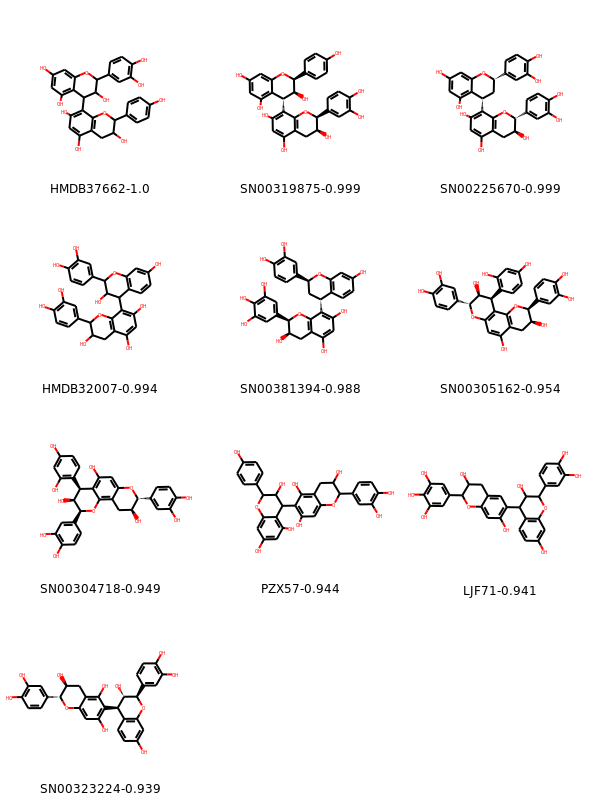

In [22]:
plotPannel(tlid, clusterid=112)

/opt/conda/lib/python3.6/site-packages/chemwalker-0.0.1-py3.6.egg/chemwalker/draw.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


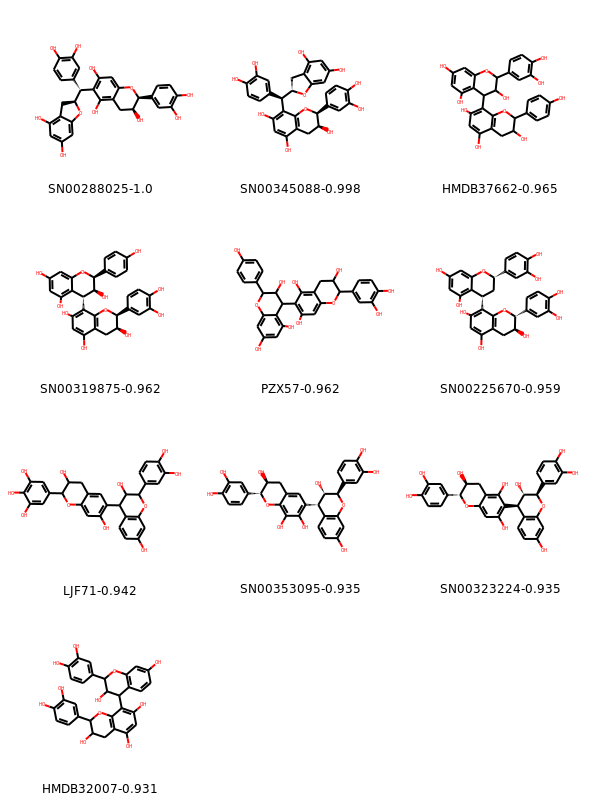

In [23]:
plotPannel(tlid, clusterid=112, score='Score')

In [24]:
if not os.path.exists('figs'):
    os.mkdir('figs')

plotGraph(match_tab, gnps_tab, tlid, net, method='MF',
         dr='figs', comp=10, option=1, pos_scale=300)
    
plotGraph(match_tab, gnps_tab, tlid, net, method='RW',
         dr='figs', comp=10, option=1, pos_scale=300)

In [25]:
tlid['cluster index'].value_counts()

1076    43
112     33
307     33
387     10
1108    10
830     10
3007     4
1412     1
1647     1
Name: cluster index, dtype: int64

In [ ]:
!ls

In [26]:
!zip -r res_chw.zip figs/ comp_10_MF.html comp_10_RW.html

updating: figs/ (stored 0%)
updating: figs/LM_1647.png (deflated 13%)
updating: figs/MF_830.png (deflated 7%)
updating: figs/MF_112.png (deflated 12%)
updating: figs/RW_387.png (deflated 12%)
updating: figs/MF_3007.png (deflated 20%)
updating: figs/MF_1108.png (deflated 7%)
updating: figs/RW_1076.png (deflated 9%)
updating: figs/MF_307.png (deflated 12%)
updating: figs/RW_307.png (deflated 10%)
updating: figs/RW_3007.png (deflated 20%)
updating: figs/MF_387.png (deflated 11%)
updating: figs/RW_830.png (deflated 7%)
updating: figs/RW_112.png (deflated 10%)
updating: figs/RW_1108.png (deflated 7%)
updating: figs/MF_1076.png (deflated 9%)
updating: figs/LM_1412.png (deflated 13%)
updating: comp_10_MF.html (deflated 78%)
updating: comp_10_RW.html (deflated 78%)


In [27]:
taskid = 'e3b521658618404a822b238992d70955'

gnps_result = Proteosafe(taskid, 'FBMN')
gnps_result.get_gnps()
net = gnps_result.net
gnps_tab = gnps_result.gnps
spectra = gnps_result.spectra
match_tab = gnps_result.dbmatch

In [28]:
net['ComponentIndex'].value_counts().to_dict()

{204: 263,
 59: 262,
 26: 229,
 139: 196,
 27: 194,
 2: 178,
 8: 177,
 21: 176,
 45: 140,
 199: 128,
 61: 125,
 50: 122,
 424: 118,
 79: 118,
 67: 113,
 125: 108,
 258: 108,
 190: 107,
 272: 106,
 226: 105,
 13: 105,
 30: 103,
 86: 100,
 183: 99,
 243: 96,
 174: 96,
 60: 95,
 19: 93,
 385: 91,
 82: 89,
 58: 85,
 98: 78,
 261: 78,
 374: 76,
 119: 75,
 12: 75,
 232: 74,
 709: 70,
 48: 69,
 306: 66,
 207: 66,
 412: 66,
 140: 66,
 697: 63,
 84: 63,
 153: 63,
 116: 62,
 301: 61,
 476: 61,
 159: 58,
 403: 58,
 69: 58,
 4: 56,
 70: 55,
 99: 55,
 899: 55,
 629: 53,
 163: 52,
 286: 50,
 224: 50,
 569: 50,
 143: 49,
 421: 47,
 28: 47,
 321: 46,
 92: 44,
 356: 44,
 73: 42,
 78: 41,
 126: 40,
 329: 38,
 114: 38,
 37: 37,
 185: 37,
 547: 36,
 221: 36,
 271: 34,
 1039: 31,
 722: 31,
 576: 31,
 523: 30,
 211: 30,
 327: 29,
 282: 29,
 240: 29,
 181: 29,
 578: 28,
 528: 28,
 396: 28,
 233: 27,
 931: 26,
 66: 26,
 882: 26,
 179: 26,
 212: 26,
 1398: 24,
 582: 23,
 774: 23,
 683: 23,
 471: 22,
 923: 22,


In [29]:
gnps_result.check_comp(391)

Component of 9 nodes, with 2 InChI or Smiles present.


In [30]:
%%time

tlid = walk_conn_comp(net=net, spectra=spectra, tabgnps=gnps_tab, 
                      dbmatch=match_tab.copy(), db=db, comp_index=391,
                      metpath=metpath)

Component with 9 nodes
Calculating in silico fragmentation with MetFrag...
in silico fragmentation done in: 21.70391535758972 seconds
Calculating pairwise candidate similarities...
similarities done in: 7.348873615264893 seconds
Seed - InChIKey1:RZGFUGXQKMEMOO, cluster index:6015, Identifier:CCMSLIB00000856124
Seed - InChIKey1:RZGFUGXQKMEMOO, cluster index:73613, Identifier:CCMSLIB00000856124
Walking on the graph...
walking done in: 0.01034998893737793 seconds
CPU times: user 4.56 s, sys: 492 ms, total: 5.05 s
Wall time: 29.6 s


In [31]:
tlid['cluster index'].value_counts()

68689    46
4952     40
59028    34
32310    31
63207    26
64138    10
9028      2
73613     1
6015      1
Name: cluster index, dtype: int64

/opt/conda/lib/python3.6/site-packages/chemwalker-0.0.1-py3.6.egg/chemwalker/draw.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


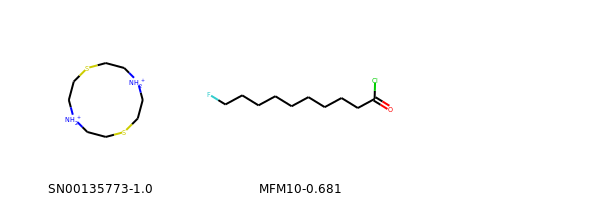

In [32]:
plotPannel(tlid, clusterid=9028)

In [33]:
!rm -rf figs

In [34]:
if not os.path.exists('figs'):
    os.mkdir('figs')

plotGraph(match_tab, gnps_tab, tlid, net, method='MF',
         dr='figs', comp=391, option=1, pos_scale=300)
    
plotGraph(match_tab, gnps_tab, tlid, net, method='RW',
         dr='figs', comp=391, option=1, pos_scale=300)

In [35]:
!network_walk --help

Usage: network_walk [OPTIONS] COMMAND [ARGS]...

Options:
  --help  Show this message and exit.

Commands:
  plot-graph
  plot-pannel
  random-walk


In [36]:
!network_walk random-walk --help

Usage: network_walk random-walk [OPTIONS]

Options:
  --taskid TEXT    GNPS task id
  --workflow TEXT  Workflow type, either FBMN or V2
  --comp INTEGER   Component (Molecular family) index
  --db TEXT        .psv Database file
  --out TEXT       Output file name
  --kw TEXT        Key word value arguments
  --help           Show this message and exit.


In [37]:
db.to_csv('validation_db.psv', sep='|', index=None)

In [38]:
!network_walk random-walk \
    --taskid e3b521658618404a822b238992d70955 \
    --workflow FBMN \
    --comp 391 \
    --db validation_db.psv \
    --kw {\"metpath\":\"/srv/jupyterhub/MetFrag2.3-CL.jar\"} \
    --out test_run

Retrieving GNPS result...
Component with 9 nodes
Calculating in silico fragmentation with MetFrag...
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - Got 2 candidate(s)
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 50 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 100 %
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - 0 candidate(s) were discarded before processing due to pre-filtering
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - 0 candidate(s) discarded during processing due to errors
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - 0 candidate(s) discarded after processing due to post-filtering
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - Stored 2 candidate(s)
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - Got 26 candidate(s)
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 10 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 20 %
INFO  de.ipbhalle.metfraglib.pr